<a href="https://colab.research.google.com/github/yohanesnuwara/computational-geophysics/blob/master/seismic/seis_util.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/yohanesnuwara/d2geo

Cloning into 'd2geo'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 78 (delta 9), reused 0 (delta 0), pack-reused 52
Unpacking objects: 100% (78/78), done.


In [14]:
!pip install segyio

     |████████████████████████████████| 92kB 3.5MB/s 


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
filename = '/content/drive/My Drive/Public geoscience Data/Dutch F3 seismic data/Dutch Government_F3_entire_8bit seismic.segy'

In [191]:
import segyio

with segyio.open(filename) as f:
  print('Inline range from', min(f.ilines), 'to', max(f.ilines))
  print('Crossline range from', min(f.xlines), 'to', max(f.xlines)) 
  data = segyio.tools.cube(f)
  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

  inlines = f.ilines
  crosslines = f.xlines
  twt = f.samples

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 100 to 750
Crossline range from 300 to 1250


'The 99th percentile is 6517; the max amplitude is 32767'

In [0]:
def slicing(cube, type, loc, a_line):

  """
  Slicing a seismic cube to inline section, crossline section, or timeslice section

  Input:

  cube: 3d numpy array, data (output of segyio read)
  type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
  loc: the location of inline, crossline, or timeslice depends on the type
       you're choosing (integer/float)
  a_line: array of inline, crossline, and timeslice locations, depends on the 
          type you're choosing (1D numpy array)
  """

  import numpy as np

  if type == 'il':
    id = np.where(a_line == loc)[0][0]
    slices = data[id,:,:]
  
  if type == 'xl':
    id = np.where(a_line == loc)[0][0]
    slices = data[:,id,:]
  
  if type == 'ts':
    id = np.where(a_line == loc)[0][0]
    slices = data[:,:,id]
  
  return(slices)

In [0]:
def display_slice(slices, type, b_line, c_line, cmap, vmin, vmax):

  """
  Display the slice

  Input:

  slices: the slice data, 2D numpy array
  type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
  b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                  type you're choosing (1D numpy array)
  * for 'il': b_line = crossline array, c_line = twt array
  * for 'xl': b_line = inline array, c_line = twt array
  * for 'ts': b_line = inline array, c_line = crossline array

  cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
        jet, Accent, ...)
  vmin, vmax: the minimum and maximum range for colormap. Many options:
  * None, None: normal and default plotting
  * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
  * vmin = -percentile99, vmax = +percentile99, percentiles of the cube

  """

  import numpy as np
  import matplotlib.pyplot as plt

  if type == 'il' or type == 'xl':
    extent = [b_line[0], b_line[-1], c_line[-1], c_line[0]]
    p1 = plt.imshow(slices.T, vmin=vmin, vmax=vmax, aspect='auto', extent=extent, cmap=cmap)
    plt.colorbar(p1)
   
  if type == 'ts':
    extent = [b_line[0], b_line[-1], c_line[-1], c_line[0]]
    p1 = plt.imshow(slices.T, vmin=vmin, vmax=vmax, aspect='auto', extent=extent, cmap=cmap)
    plt.colorbar(p1)

In [80]:
help(display_slice)

Help on function display_slice in module __main__:

display_slice(slices, type, b_line, c_line, cmap, vmin, vmax)
    Display the slice
    
    Input:
    
    slices: the slice data, 2D numpy array
    type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
    b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                    type you're choosing (1D numpy array)
    * for 'il': b_line = crossline array, c_line = twt array
    * for 'xl': b_line = inline array, c_line = twt array
    * for 'ts': b_line = inline array, c_line = crossline array
    
    cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
          jet, Accent, ...)
    vmin, vmax: the minimum and maximum range for colormap. Many options:
    * None, None: normal and default plotting
    * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
    * vmin = -percentile99, vmax = +percentile99, percentiles of the cube



In [92]:
print(inlines[:10])
print(crosslines[:10])
print(twt[:10])

[100 101 102 103 104 105 106 107 108 109]
[300 301 302 303 304 305 306 307 308 309]
[1004. 1008. 1012. 1016. 1020. 1024. 1028. 1032. 1036. 1040.]


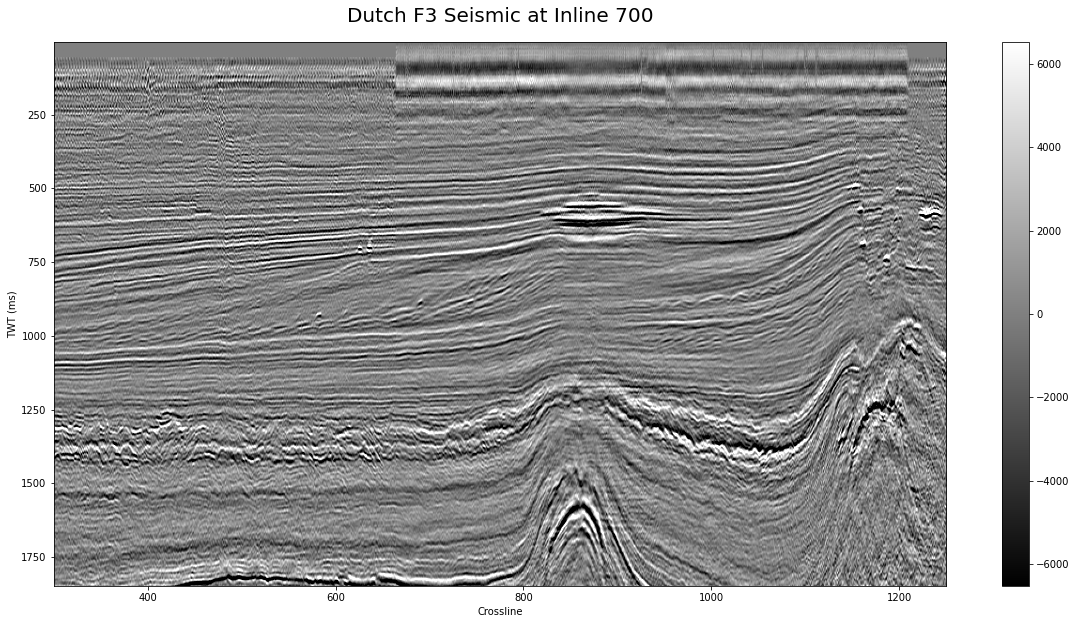

In [224]:
inline_number = 700

slices = slicing(data, 'il', inline_number, inlines)

plt.figure(figsize=(20,10))
display_slice(slices, 'il', crosslines, twt, 'gray', -vm, vm) # call function
plt.title('Dutch F3 Seismic at Inline {}'.format(inline_number), size=20, pad=20)
plt.xlabel('Crossline'); plt.ylabel('TWT (ms)')
plt.show()

In [180]:
slices.shape

(951, 462)

In [173]:
len(crosslines)

951

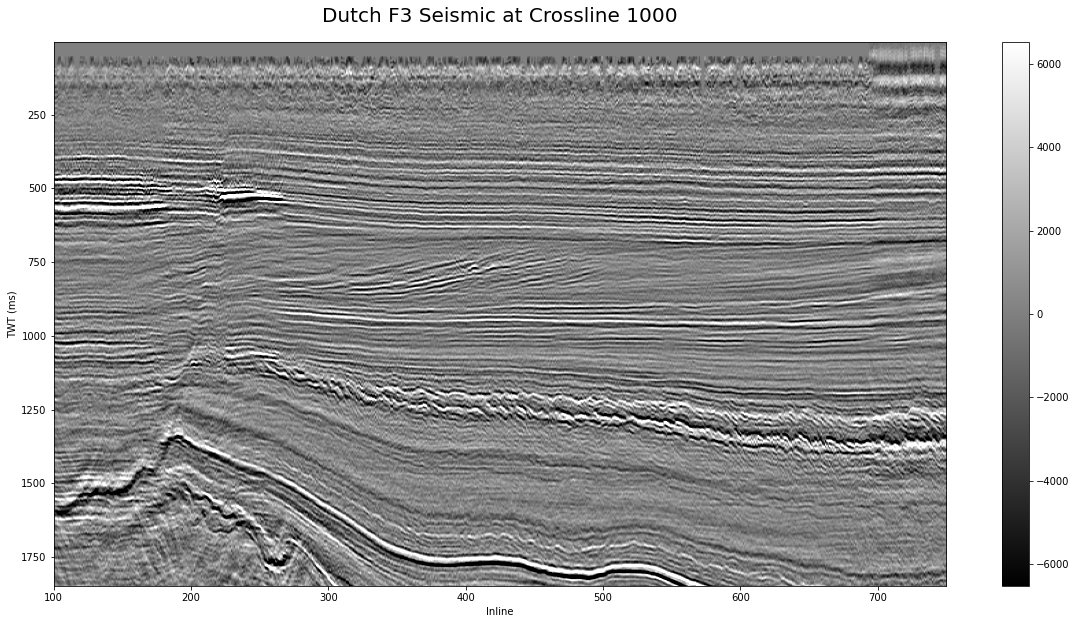

In [239]:
xline_number = 1000

slices = slicing(data, 'xl', xline_number, crosslines)

plt.figure(figsize=(20,10))
display_slice(slices, 'xl', inlines, twt, 'gray', -vm, vm) # call function
plt.title('Dutch F3 Seismic at Crossline {}'.format(xline_number), size=20, pad=20)
plt.xlabel('Inline'); plt.ylabel('TWT (ms)')
plt.show()

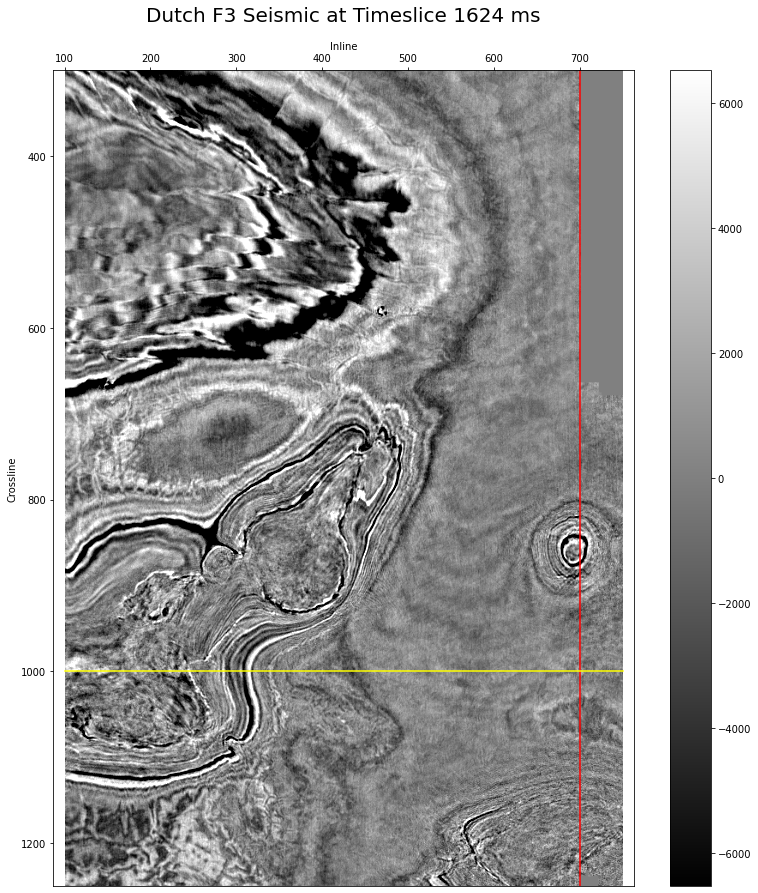

In [247]:
timeslice = 1624 # ms

slices = slicing(data, 'ts', timeslice, twt)

slices.shape

plt.figure(figsize=(13,15))
display_slice(slices, 'ts', inlines, crosslines, 'gray', -vm, vm) # call function
plt.title('Dutch F3 Seismic at Timeslice {} ms'.format(timeslice), size=20, pad=20)
plt.plot([inline_number, inline_number], [min(crosslines), max(crosslines)], color='red')
plt.plot([min(inlines), max(inlines)], [xline_number, xline_number], color='yellow')
plt.xlabel('Inline'); plt.ylabel('Crossline')
plt.gca().xaxis.set_ticks_position('top') # axis on top
plt.gca().xaxis.set_label_position('top') # label on top
plt.axis('equal')
plt.show()

In [178]:
slices.shape

(651, 951)

In [120]:
min(inlines), max(inlines), min(crosslines), max(crosslines)

(100, 750, 300, 1250)

In [198]:
1500 + (1750 - 1500) /2

1625.0